<a href="https://colab.research.google.com/github/Nataliya2401/DS_11/blob/main/hw_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras as K
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [193]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils

In [194]:
from keras.src import callbacks
from keras.optimizers import Adam, Adamax
from keras.callbacks import EarlyStopping

In [195]:
num_classes = 10 # загальна кількість класів
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784

learn_rate = 0.001 # швидкість навчання нейронної мережі
batch_size = 512 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
n_hidden_1 = 512 # кількість нейронів 1-го шару
n_hidden_2 = 128 # кількість нейронів 2-го шару

In [238]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [197]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [198]:
x_train[0].shape

(28, 28)

In [199]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

In [200]:
class_name[y_train[0]]

'Ankle_boot'

<ipython-input-201-a93e42dc1f24>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,5,i+1)


<Figure size 1000x1000 with 0 Axes>

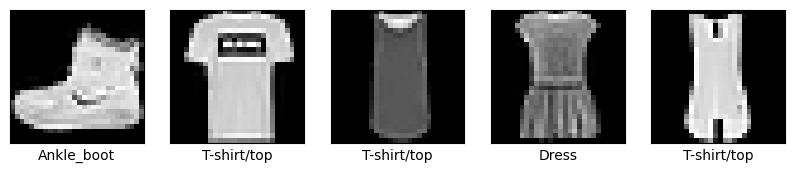

In [201]:
plt.figure(figsize=(10,10))

fig, ax = plt.subplots(1,3, figsize=(10, 4))

for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(x_train[i], cmap='gray')
  plt.xlabel(class_name[y_train[i]])

plt.show()


In [202]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [239]:
# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.
# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [204]:
x_test.shape, y_test.shape

((10000, 784), (10000,))

In [240]:
# Створимо нейронну мережу
model = Sequential([
    Dense(n_hidden_1, input_shape=(784,), activation='relu'),
    Dense(n_hidden_2, activation='relu'),
    Dense(10, activation='softmax')
])

In [241]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 512)               401920    
                                                                 
 dense_73 (Dense)            (None, 128)               65664     
                                                                 
 dense_74 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [242]:
model.compile(
    optimizer=Adam(learning_rate=learn_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=1235)

In [207]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((48000, 784), (60000,), (12000, 784), (12000,))

In [244]:
y_train[:5],

(array([8, 1, 9, 2, 1], dtype=uint8),)

In [231]:
# Тренування мережі
history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/20
100/100 [==============================] - 4s 34ms/step - loss: 0.6151 - accuracy: 0.7882 - val_loss: 0.4265 - val_accuracy: 0.8577
Epoch 2/20
100/100 [==============================] - 4s 44ms/step - loss: 0.4048 - accuracy: 0.8567 - val_loss: 0.3855 - val_accuracy: 0.8648
Epoch 3/20
100/100 [==============================] - 3s 32ms/step - loss: 0.3603 - accuracy: 0.8709 - val_loss: 0.3693 - val_accuracy: 0.8639
Epoch 4/20
100/100 [==============================] - 3s 32ms/step - loss: 0.3297 - accuracy: 0.8808 - val_loss: 0.3444 - val_accuracy: 0.8819
Epoch 5/20
100/100 [==============================] - 3s 32ms/step - loss: 0.3061 - accuracy: 0.8887 - val_loss: 0.3189 - val_accuracy: 0.8894
Epoch 6/20
100/100 [==============================] - 4s 43ms/step - loss: 0.2928 - accuracy: 0.8931 - val_loss: 0.3138 - val_accuracy: 0.8898
Epoch 7/20
100/100 [==============================] - 3s 31ms/step - loss: 0.2751 - accuracy: 0.9000 - val_loss: 0.3240 - val_accuracy: 0.8862

In [232]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.3445635735988617
Test accuracy:  0.8888000249862671


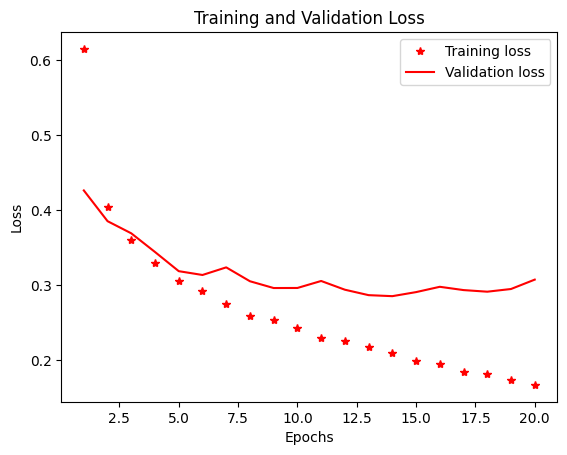

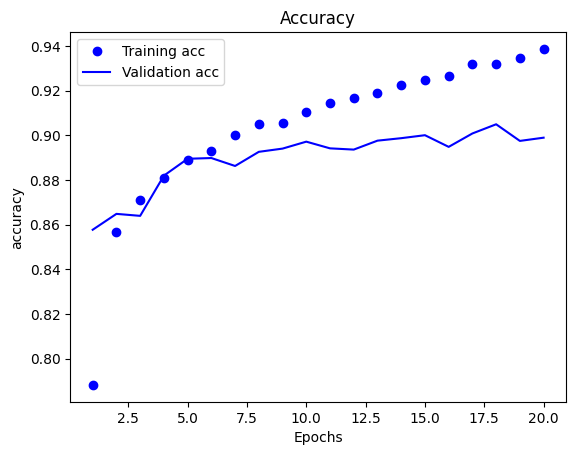

In [233]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) +1)

plt.figure()
plt.plot(epochs, loss_values, 'r*', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Виведіть графік точності
plt.clf()
val_acc_values = history_dict['val_accuracy']
acc_values = history_dict['accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [245]:
y_train[:5],

(array([8, 1, 9, 2, 1], dtype=uint8),)

Зменшимо кількість епох до 15

In [246]:
history2 = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=15,
                    verbose=2,
                    validation_data=(X_val, y_val))

Epoch 1/15
100/100 - 4s - loss: 0.6286 - accuracy: 0.7831 - val_loss: 0.4666 - val_accuracy: 0.8323 - 4s/epoch - 42ms/step
Epoch 2/15
100/100 - 4s - loss: 0.4117 - accuracy: 0.8548 - val_loss: 0.3890 - val_accuracy: 0.8604 - 4s/epoch - 38ms/step
Epoch 3/15
100/100 - 3s - loss: 0.3666 - accuracy: 0.8697 - val_loss: 0.3591 - val_accuracy: 0.8686 - 3s/epoch - 29ms/step
Epoch 4/15
100/100 - 3s - loss: 0.3352 - accuracy: 0.8781 - val_loss: 0.3264 - val_accuracy: 0.8833 - 3s/epoch - 27ms/step
Epoch 5/15
100/100 - 3s - loss: 0.3132 - accuracy: 0.8860 - val_loss: 0.3344 - val_accuracy: 0.8789 - 3s/epoch - 27ms/step
Epoch 6/15
100/100 - 4s - loss: 0.2917 - accuracy: 0.8928 - val_loss: 0.3219 - val_accuracy: 0.8829 - 4s/epoch - 39ms/step
Epoch 7/15
100/100 - 3s - loss: 0.2766 - accuracy: 0.8984 - val_loss: 0.2998 - val_accuracy: 0.8907 - 3s/epoch - 27ms/step
Epoch 8/15
100/100 - 3s - loss: 0.2648 - accuracy: 0.9017 - val_loss: 0.3202 - val_accuracy: 0.8768 - 3s/epoch - 28ms/step
Epoch 9/15
100/1

In [247]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.31540176272392273
Test accuracy:  0.8927000164985657


In [248]:
# Збережемо параметри моделі
model.save("my_model1")

In [249]:
learn_rate = 0.001 # швидкість навчання нейронної мережі
batch_size = 512 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
n_hidden_1 = 784 # кількість нейронів 1-го шару
n_hidden_2 = 128 # кількість нейронів 2-го шару
n_hidden_3 = 64 # кількість нейронів 3-го шару

In [250]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [251]:
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(4500).batch(batch_size).prefetch(1)

In [252]:
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

In [253]:
# Створимо нейронну мережу
model2 = Sequential([
    Dense(n_hidden_1, input_shape=(784,), activation='relu'),
    Dropout(0.3),
    Dense(n_hidden_2, activation='relu'),
    Dropout(0.1),
    Dense(n_hidden_3, activation='relu'),
    Dense(10, activation='softmax')
])

In [254]:
model2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 784)               615440    
                                                                 
 dropout_17 (Dropout)        (None, 784)               0         
                                                                 
 dense_76 (Dense)            (None, 128)               100480    
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dense_78 (Dense)            (None, 10)                650       
                                                                 
Total params: 724826 (2.76 MB)
Trainable params: 7248

In [255]:
model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [256]:
early_stopping = EarlyStopping('loss', patience=5)
callbacks = [early_stopping]

history3 = model2.fit(X_train, y_train, batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_val, y_val),
                      callbacks=callbacks)

Epoch 1/30
94/94 [==============================] - 9s 77ms/step - loss: 0.7123 - accuracy: 0.7463 - val_loss: 0.4364 - val_accuracy: 0.8481
Epoch 2/30
94/94 [==============================] - 5s 50ms/step - loss: 0.4495 - accuracy: 0.8378 - val_loss: 0.4022 - val_accuracy: 0.8560
Epoch 3/30
94/94 [==============================] - 6s 60ms/step - loss: 0.3970 - accuracy: 0.8565 - val_loss: 0.3394 - val_accuracy: 0.8807
Epoch 4/30
94/94 [==============================] - 5s 52ms/step - loss: 0.3639 - accuracy: 0.8674 - val_loss: 0.3319 - val_accuracy: 0.8836
Epoch 5/30
94/94 [==============================] - 5s 49ms/step - loss: 0.3457 - accuracy: 0.8730 - val_loss: 0.3137 - val_accuracy: 0.8882
Epoch 6/30
94/94 [==============================] - 6s 64ms/step - loss: 0.3281 - accuracy: 0.8789 - val_loss: 0.3075 - val_accuracy: 0.8932
Epoch 7/30
94/94 [==============================] - 5s 50ms/step - loss: 0.3134 - accuracy: 0.8837 - val_loss: 0.3059 - val_accuracy: 0.8914
Epoch 8/30
94

In [257]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.3095560669898987
Test accuracy:  0.8938000202178955


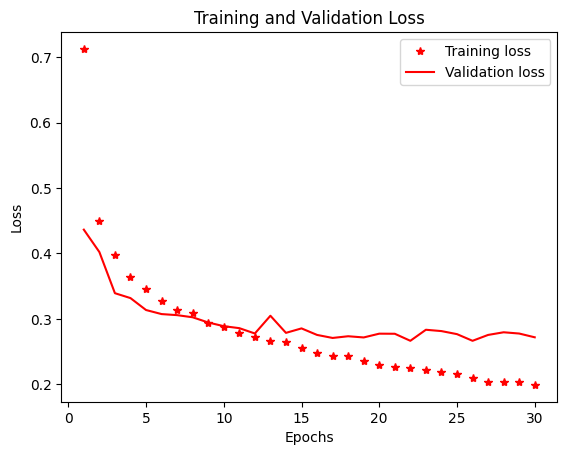

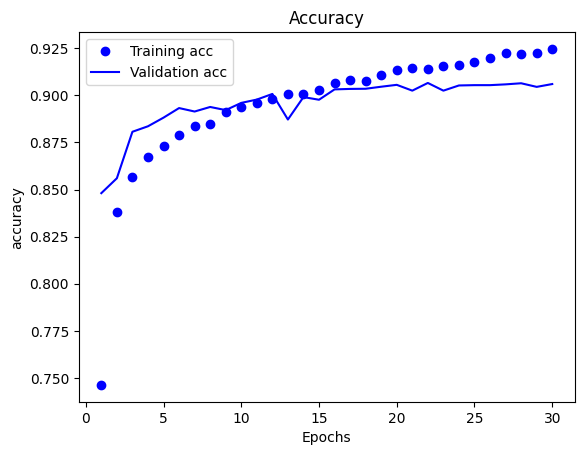

In [258]:
history_dict = history3.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) +1)

plt.figure()
plt.plot(epochs, loss_values, 'r*', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Виведіть графік точності
plt.clf()
val_acc_values = history_dict['val_accuracy']
acc_values = history_dict['accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

For model2 make number epoch - 23

In [264]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(4000).batch(batch_size).prefetch(1)
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=777)

In [265]:
model3 = Sequential([
    Dense(n_hidden_1, input_shape=(784,), activation='relu'),
    Dropout(0.3),
    Dense(n_hidden_2, activation='relu'),
    Dropout(0.1),
    Dense(n_hidden_3, activation='relu'),
    Dense(10, activation='softmax')
])

In [266]:
model3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [267]:
early_stopping = EarlyStopping('loss', patience=5)
callbacks = [early_stopping]

history4 = model3.fit(X_train, y_train, batch_size=batch_size,
                    epochs=23,
                    verbose=1,
                    validation_data=(X_val, y_val),
                      callbacks=callbacks)

Epoch 1/23
94/94 [==============================] - 6s 50ms/step - loss: 0.6900 - accuracy: 0.7545 - val_loss: 0.4273 - val_accuracy: 0.8478
Epoch 2/23
94/94 [==============================] - 6s 64ms/step - loss: 0.4401 - accuracy: 0.8405 - val_loss: 0.3702 - val_accuracy: 0.8645
Epoch 3/23
94/94 [==============================] - 7s 73ms/step - loss: 0.3861 - accuracy: 0.8601 - val_loss: 0.3581 - val_accuracy: 0.8676
Epoch 4/23
94/94 [==============================] - 5s 54ms/step - loss: 0.3650 - accuracy: 0.8662 - val_loss: 0.3345 - val_accuracy: 0.8779
Epoch 5/23
94/94 [==============================] - 5s 58ms/step - loss: 0.3402 - accuracy: 0.8747 - val_loss: 0.3187 - val_accuracy: 0.8858
Epoch 6/23
94/94 [==============================] - 5s 50ms/step - loss: 0.3255 - accuracy: 0.8787 - val_loss: 0.3167 - val_accuracy: 0.8831
Epoch 7/23
94/94 [==============================] - 6s 63ms/step - loss: 0.3138 - accuracy: 0.8842 - val_loss: 0.3037 - val_accuracy: 0.8894
Epoch 8/23
94

In [268]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.3149718642234802
Test accuracy:  0.8924999833106995


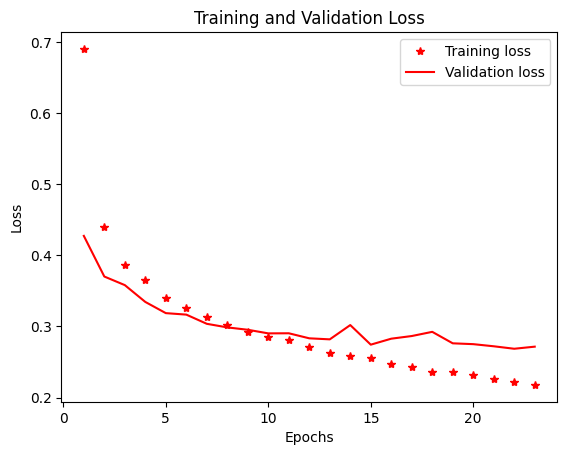

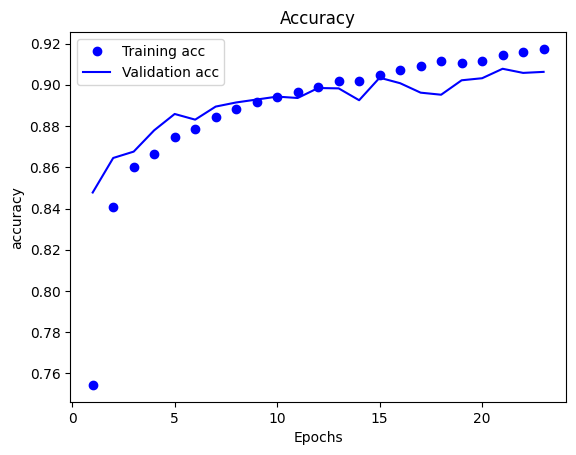

In [269]:
history_dict = history4.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) +1)

plt.figure()
plt.plot(epochs, loss_values, 'r*', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Виведіть графік точності
plt.clf()
val_acc_values = history_dict['val_accuracy']
acc_values = history_dict['accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Висновок

Кращі результати на тесті показала модель2 з кількістю епох 30.
*  Test loss:  0.3095560669898987

*   Test accuracy:  0.8938000202178955

model2:
*   Dense(784, input_shape=(784,), activation='relu'),
*   Dropout(0.3),  
*   Dense(128, activation='relu'),
*   Dropout(0.1),


*   Dense(64, activation='relu'),
*   Dense(10, activation='softmax')